# Reading and Cleaning Data

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [164]:
df = pd.read_csv("C:/Users/Windows/Documents/KARE/SEM 5/DA/bread basket .csv")

In [165]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [166]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [168]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

In [169]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [170]:
# Count of unique customers
df['Transaction'].nunique()

9465

In [171]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [172]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [173]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

# Data Visualization

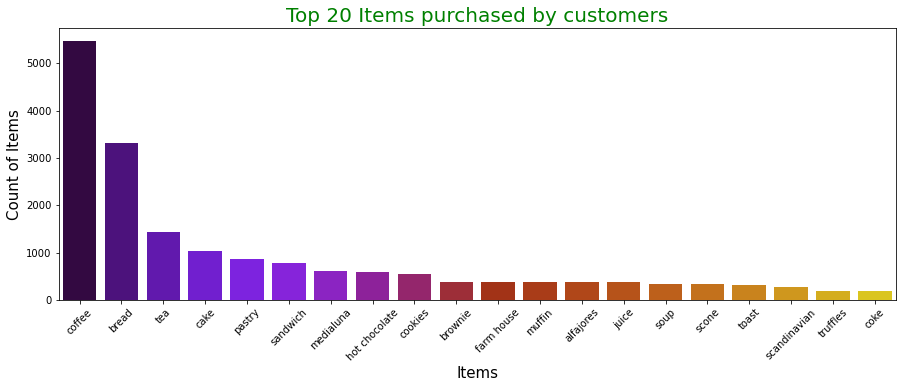

In [174]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [175]:
#Coffee has the highest transactions.
#Coke is the 20th most buyed product.

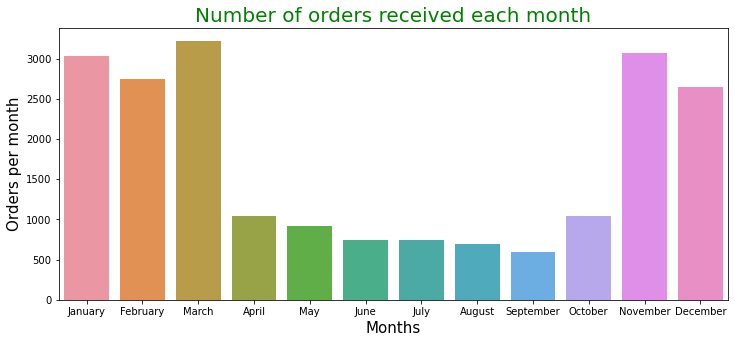

In [176]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

In [177]:
#Most transactions were in March, January, February, November, December

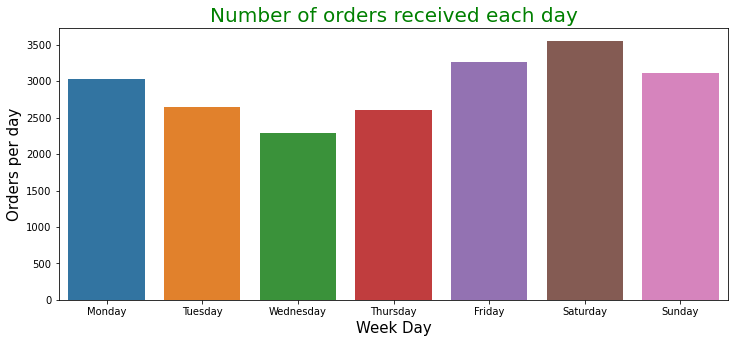

In [178]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

In [179]:
#People order more on weekends.

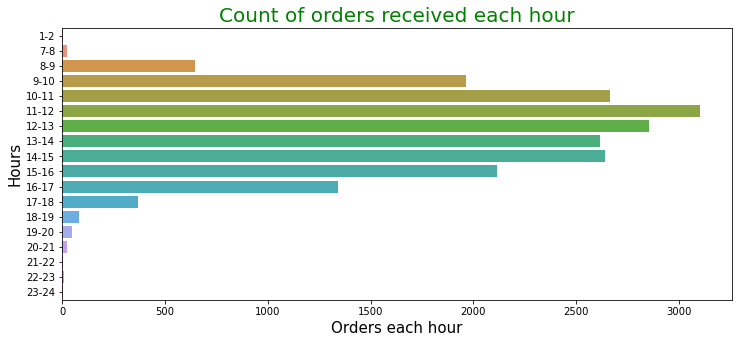

In [180]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

In [181]:
#People order more during the afternoon, since there are a lot of maximum order percentage between 12-5.

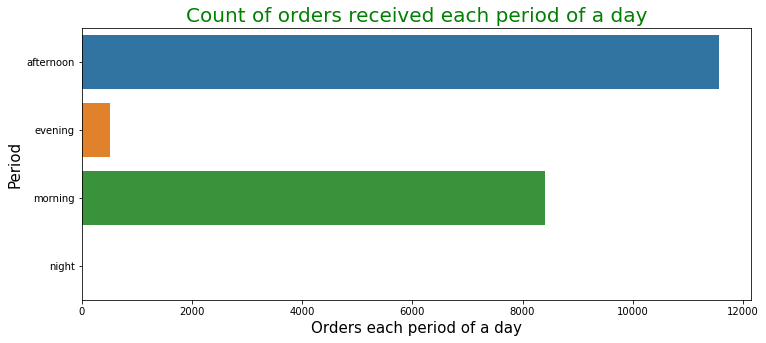

In [182]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [183]:
#People prefer to order in the morning and afternoon.

In [184]:
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday
1169,2017-03-25,246,Saturday
1415,2017-04-02,292,Sunday
1707,2017-04-03,257,Monday
1964,2017-08-04,205,Friday
2169,2017-11-03,203,Friday


In [185]:
#Mostly transactions are on weekends, as we saw earlier in our graph.

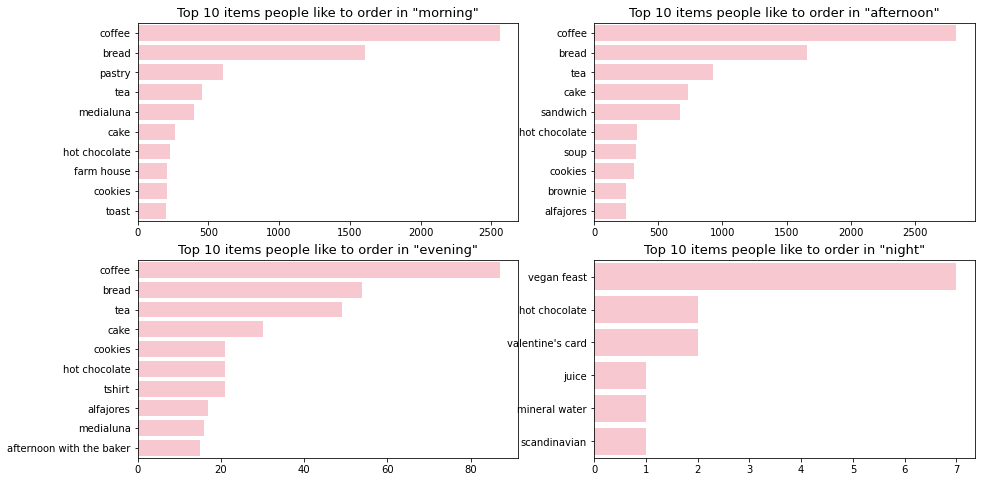

In [186]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

# Apriori Algorithm

In [187]:
from mlxtend.frequent_patterns import association_rules, apriori

In [188]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [189]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

C:\Users\Windows\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(coffee, cake, bread)"
59,0.011199,"(coffee, pastry, bread)"


In [192]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [193]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


# FREQUENT ITEMS SOLD TOGETHER

In [194]:
# Assuming you've generated frequent_items DataFrame

frequent_groceries = frequent_items['itemsets']
print(frequent_groceries)


0                 (alfajores)
1                  (baguette)
2                     (bread)
3                   (brownie)
4                      (cake)
               ...           
56            (coffee, toast)
57            (tea, sandwich)
58      (coffee, cake, bread)
59    (coffee, pastry, bread)
60        (coffee, tea, cake)
Name: itemsets, Length: 61, dtype: object


In [195]:
# Generate frequent itemsets
frequent_itemsets = apriori(my_basket_sets, min_support=0.01, use_colnames=True)

# Filter for itemsets of size 2, 3, and 4
frequent_itemsets_2 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
frequent_itemsets_3 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]


# Display the frequent itemsets
print("Frequent Itemsets of Size 2:")
print(frequent_itemsets_2)

print("\nFrequent Itemsets of Size 3:")
print(frequent_itemsets_3)


Frequent Itemsets of Size 2:
     support                  itemsets
30  0.010354        (bread, alfajores)
31  0.019651       (coffee, alfajores)
32  0.010777          (brownie, bread)
33  0.023349             (cake, bread)
34  0.090016           (coffee, bread)
35  0.014474          (bread, cookies)
36  0.013418    (hot chocolate, bread)
37  0.016904        (medialuna, bread)
38  0.029160           (pastry, bread)
39  0.017010         (sandwich, bread)
40  0.028104              (tea, bread)
41  0.019651         (coffee, brownie)
42  0.054728            (coffee, cake)
43  0.011410     (hot chocolate, cake)
44  0.023772               (tea, cake)
45  0.028209         (coffee, cookies)
46  0.029583   (coffee, hot chocolate)
47  0.020602           (coffee, juice)
48  0.035182       (coffee, medialuna)
49  0.018806          (coffee, muffin)
50  0.047544          (coffee, pastry)
51  0.038246        (coffee, sandwich)
52  0.018067           (coffee, scone)
53  0.015848            (coffee, so

C:\Users\Windows\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


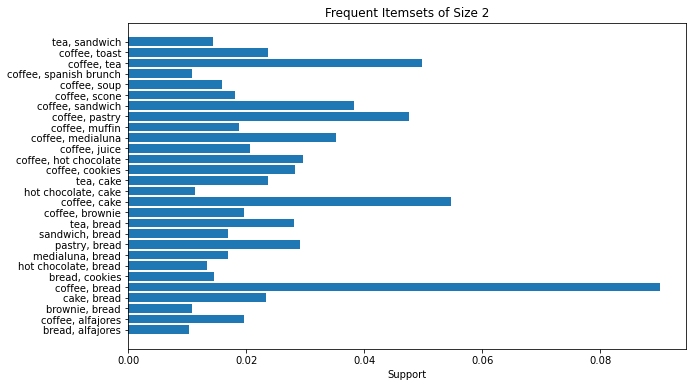

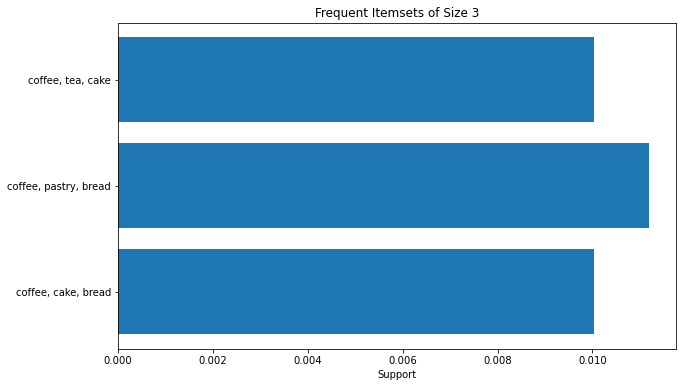

In [196]:
import matplotlib.pyplot as plt

def plot_frequent_itemsets(frequent_itemsets, size):
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
    plt.yticks(range(len(frequent_itemsets)), [', '.join(itemset) for itemset in frequent_itemsets['itemsets']])
    plt.xlabel('Support')
    plt.title(f'Frequent Itemsets of Size {size}')
    plt.show()

# Plot frequent itemsets of size 2, 3, and 4
plot_frequent_itemsets(frequent_itemsets_2, 2)
plot_frequent_itemsets(frequent_itemsets_3, 3)

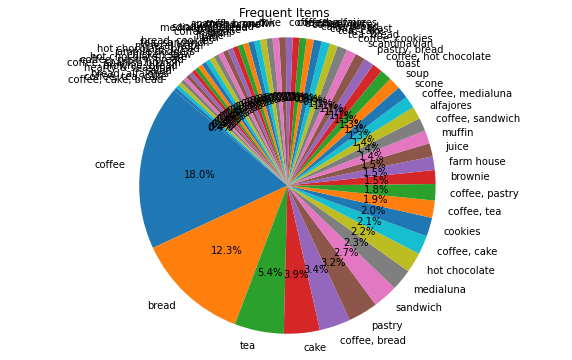

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'frequent_items' with columns 'itemsets' and 'support'

# Flatten the itemsets column
frequent_items['itemsets'] = frequent_items['itemsets'].apply(lambda x: ', '.join(x))

# Group by item and calculate total support
item_support = frequent_items.groupby('itemsets')['support'].sum().reset_index()

# Sort items by support in descending order
item_support = item_support.sort_values(by='support', ascending=False)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(item_support['support'], labels=item_support['itemsets'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Frequent Items ')
plt.show()


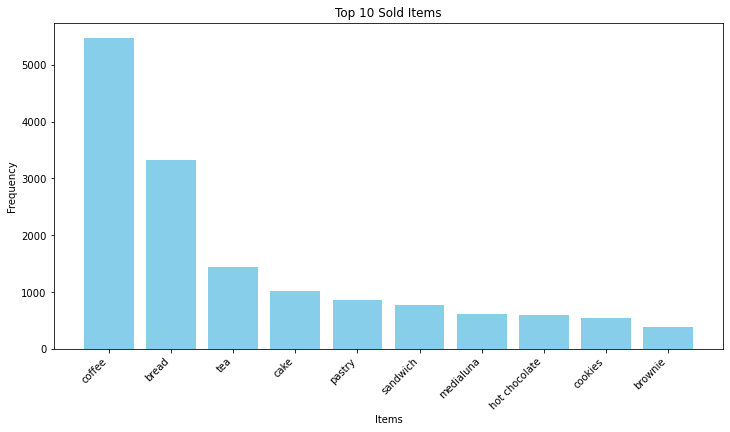

In [198]:
item_counts = df['Item'].value_counts()
top_n = 10 
# Adjust this number based on the number of items you want to display
top_items = item_counts.head(top_n)
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_items.index, top_items.values, color='skyblue')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Sold Items')
plt.xticks(rotation=45, ha='right')
plt.show()


# Association rule diagrams and Support-Confidence plots

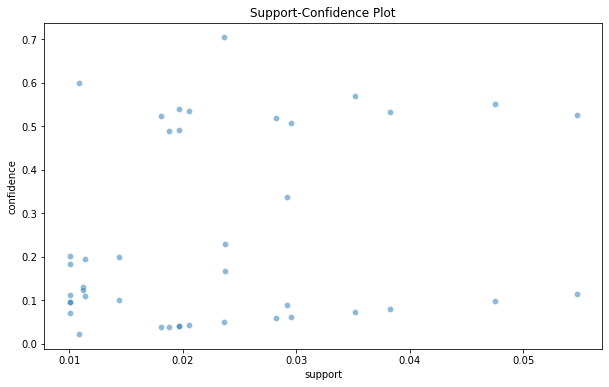

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'rules' DataFrame

# Create a scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules, alpha=0.5)
plt.title("Support-Confidence Plot")
plt.show()


C:\Users\Windows\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool 

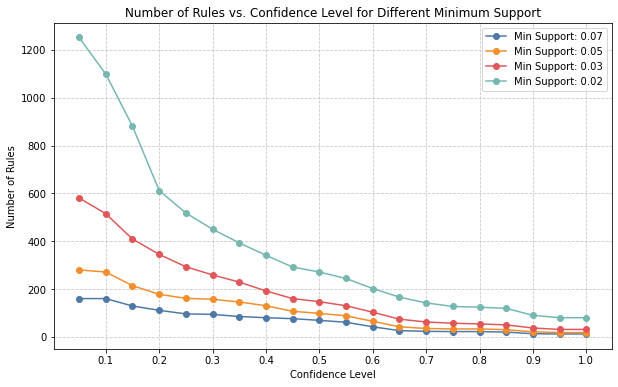

In [200]:
# List of minimum support values
min_support_values = [0.07, 0.05, 0.03, 0.02]

# Confidence levels to evaluate
confidence_levels = list(np.arange(0.05, 1.05, 0.05))

# Empty lists to store results
num_rules_lists = []

# Calculate and store the number of rules for each combination of minimum support and confidence level
for min_support in min_support_values:
    frequent_itemsets = apriori(onehot_encoded, min_support=min_support, use_colnames=True)
    rules_list = []
    for confidence_level in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
        num_rules = len(rules)
        rules_list.append(num_rules)
    num_rules_lists.append(rules_list)

# Plot the results
plt.figure(figsize=(10, 6))

colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"]

for i, min_support in enumerate(min_support_values):
    plt.plot(confidence_levels, num_rules_lists[i], marker="o", color=colors[i], label=f"Min Support: {min_support}")

plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Confidence Level for Different Minimum Support")

# Set the desired x-axis labels
plt.xticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1])

# Add grid lines for better readability
plt.grid(True, linestyle="--", alpha=0.7)

# Add legend
plt.legend()

plt.show()
